<a href="https://colab.research.google.com/github/Rahul711sharma/Classification-ML/blob/main/Airline_tweet_sentiment_analysis_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
%matplotlib inline

In [8]:
df= pd.read_csv("/content/drive/MyDrive/Tweets.csv")

In [9]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
df.shape

(14640, 15)

In [11]:
df.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


Removing all columns with null values

In [12]:
df.isna().mean()*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [13]:
df.dropna(thresh=int(df.shape[0]*1),axis='columns',how='all',inplace=True)

In [14]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


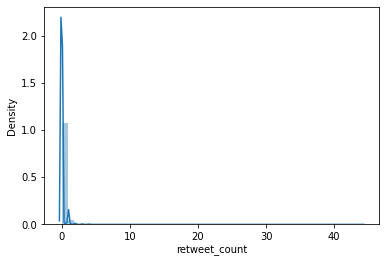

In [15]:
sns.distplot(df['retweet_count'])

##EDA

In [16]:
df['retweet_count'].describe()

count    14640.000000
mean         0.082650
std          0.745778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: retweet_count, dtype: float64

In [17]:
df['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64

In [18]:
df.drop('retweet_count',axis='columns',inplace=True)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


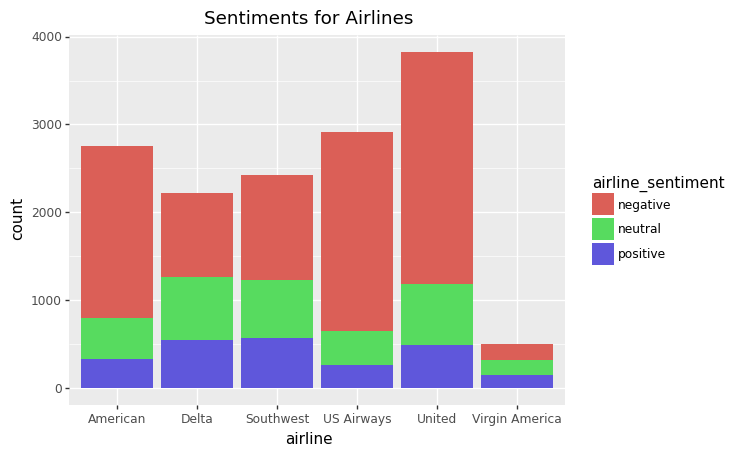

<ggplot: (8728280055173)>

In [19]:
ggplot(df)+aes('airline',fill='airline_sentiment')+geom_bar()+ggtitle('Sentiments for Airlines')

Text(0.5, 1.0, 'airline sentiment confidence')

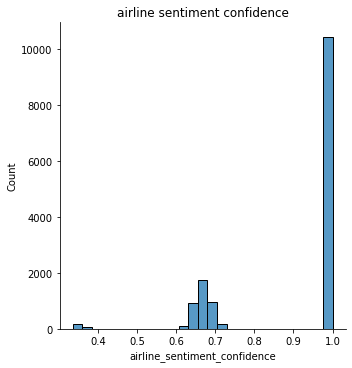

In [20]:
sns.displot(df['airline_sentiment_confidence'])
plt.title('airline sentiment confidence')

In [21]:
# As we want to analyse positive and negative sentiments only

df.drop(df[df['airline_sentiment']=='neutral'].index,axis=0,inplace=True)

In [22]:
df.shape

(11541, 7)

In [23]:
df.airline_sentiment.value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


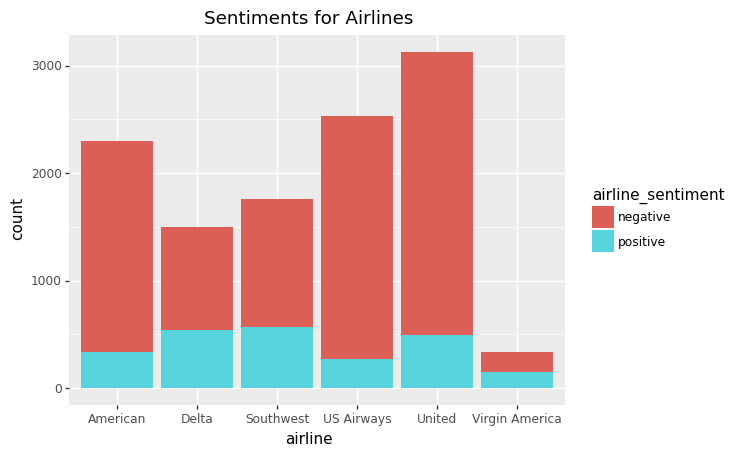

<ggplot: (8728268587953)>

In [24]:
ggplot(df)+aes('airline',fill='airline_sentiment')+geom_bar()+ggtitle('Sentiments for Airlines')

#Text Mining

In [64]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import LancasterStemmer, PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
def text_process(tweet):
  no_punc= [i for i in tweet if i not in string.punctuation]
  no_punc= ''.join(no_punc)
  return ' '.join([i for i in no_punc.split() if i.lower() not in stopwords.words('english')])

In [44]:
texts = df['text'].apply(text_process)

Stemming

In [45]:
texts = list(texts)
for i in range(len(texts)):
  texts[i]= word_tokenize(texts[i])


In [46]:
texts[1:5]

[['VirginAmerica',
  'really',
  'aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guests',
  'faces',
  'amp',
  'little',
  'recourse'],
 ['VirginAmerica', 'really', 'big', 'bad', 'thing'],
 ['VirginAmerica',
  'seriously',
  'would',
  'pay',
  '30',
  'flight',
  'seats',
  'didnt',
  'playing',
  'really',
  'bad',
  'thing',
  'flying',
  'VA'],
 ['VirginAmerica',
  'yes',
  'nearly',
  'every',
  'time',
  'fly',
  'VX',
  '“',
  'ear',
  'worm',
  '”',
  'won',
  '’',
  't',
  'go',
  'away']]

In [47]:
print(texts[1][1])
print(LancasterStemmer().stem('really'))
print(PorterStemmer().stem('really'))


really
real
realli


Evidently, We are gonna use Lancaster stemmer. Also, it's more robust than Porter stemmer algorithm

In [48]:
for i in range(len(texts)):
  for x in range(len(texts[i])):
    texts[i][x] = LancasterStemmer().stem(texts[i][x])


In [50]:
for i in range(len(texts)):
  texts[i]=' '.join(texts[i])

In [69]:
texts[1]

['virginameric real aggress blast obnoxy entertain guest fac amp littl recours',
 'virginameric real big bad thing']

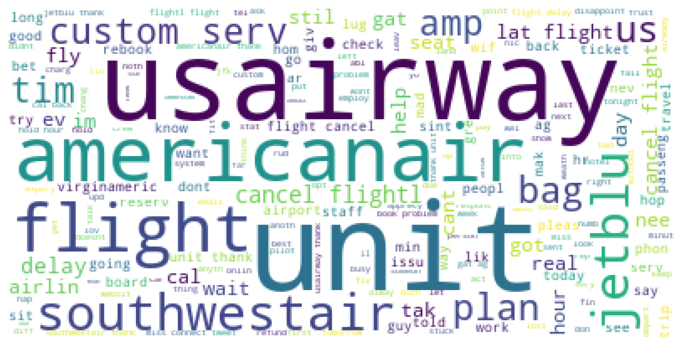

In [80]:
plt.figure(figsize=(12,12))
wordcloud= WordCloud(background_color='white').generate(' '.join(list(texts[1:len(texts)])))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


##Vectorize

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer


In [56]:
count_vectorize = CountVectorizer(max_df = 0.9,min_df = 10)
Vectorize_fit=count_vectorize.fit_transform(np.array(texts))

In [57]:
len(count_vectorize.get_feature_names())

1281

In [61]:
Vectorize_fit.toarray().shape

(11541, 1281)

In [83]:
sum(Vectorize_fit.toarray()[10])

2

In [81]:
#tf-idf vectorize

Tfidf_Vectorizer = TfidfVectorizer()
fit = Tfidf_Vectorizer.fit_transform(np.array(texts))

In [84]:
sum(fit.toarray()[10])

1.3899878930962286

##Model

In [87]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as met
from sklearn.svm import SVC

In [91]:
x_train,x_test,y_train,y_test = train_test_split(Vectorize_fit.toarray(),df['airline_sentiment'],random_state=1)

In [93]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8655, 1281)
(8655,)
(2886, 1281)
(2886,)


In [ ]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

In [101]:
%%timeit
svc_model = SVC()
svc_model.fit(x_train,y_train)

1 loop, best of 5: 1min 3s per loop


In [97]:
# model performance on train data

met.accuracy_score(y_train,svc_model.predict(x_train))

0.9595609474292317

In [98]:
# model performance on test data

met.accuracy_score(y_test,svc_model.predict(x_test))

0.913028413028413

In [112]:
#classification report on test data
print(met.classification_report(y_test,svc_model.predict(x_test)))

              precision    recall  f1-score   support

    negative       0.92      0.98      0.95      2309
    positive       0.88      0.66      0.75       577

    accuracy                           0.91      2886
   macro avg       0.90      0.82      0.85      2886
weighted avg       0.91      0.91      0.91      2886



Naive Bayes model for experiment

In [99]:
from sklearn.naive_bayes import GaussianNB

In [104]:
%%timeit
nb_model= GaussianNB()
nb_model.fit(x_train,y_train)

10 loops, best of 5: 166 ms per loop


In [107]:
# model performance on train data
met.accuracy_score(y_train,nb_model.predict(x_train))

0.5460427498555748

In [108]:
met.accuracy_score(y_test,nb_model.predict(x_test))

0.5353430353430353

Shockingly there is a huge difference between the predictions accuracy of nnaive bayes and Support vector machine